In [1]:
import tushare as ts

In [141]:
import os
import numpy as np
import pandas as pd
from pylab import plt, mpl
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'SimHei'
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False
pd.set_option('mode.chained_assignment', None)
pd.set_option('display.float_format', '{:.4f}'.format)
np.set_printoptions(suppress=True, precision=4)

In [13]:
hisdata = ts.get_hist_data('sh600362') #获取江西铜业股票数据

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


In [14]:
hisdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 606 entries, 2021-07-06 to 2019-01-07
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   open          606 non-null    float64
 1   high          606 non-null    float64
 2   close         606 non-null    float64
 3   low           606 non-null    float64
 4   volume        606 non-null    float64
 5   price_change  606 non-null    float64
 6   p_change      606 non-null    float64
 7   ma5           606 non-null    float64
 8   ma10          606 non-null    float64
 9   ma20          606 non-null    float64
 10  v_ma5         606 non-null    float64
 11  v_ma10        606 non-null    float64
 12  v_ma20        606 non-null    float64
 13  turnover      606 non-null    float64
dtypes: float64(14)
memory usage: 91.0+ KB


In [15]:
hisdata.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
date,,,,,,,,,,,,,,
2021-07-06,23.35,23.54,23.53,22.80,383657.28,0.23,0.99,22.644,22.734,22.963,297259.67,293455.29,319308.48,1.85
2021-07-05,22.06,23.31,23.30,22.05,484717.50,1.24,5.62,22.398,22.645,23.028,267278.06,291140.62,312400.76,2.34
2021-07-02,21.87,22.63,22.06,21.63,266272.06,0.11,0.50,22.318,22.523,23.103,225567.76,267826.73,308447.20,1.28
2021-07-01,22.41,22.49,21.95,21.93,188344.19,-0.43,-1.92,22.600,22.544,23.275,254941.30,272707.89,310157.75,0.91
2021-06-30,22.24,22.60,22.38,22.19,163307.33,0.08,0.36,22.736,22.573,23.454,264941.19,277705.69,317190.49,0.79


In [16]:
hisdata.tail()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
date,,,,,,,,,,,,,,
2019-01-11,13.39,13.49,13.46,13.35,58525.34,0.11,0.82,13.422,13.422,13.422,84834.25,84834.25,84834.25,0.28
2019-01-10,13.36,13.45,13.35,13.32,55791.20,-0.03,-0.22,13.413,13.413,13.413,91411.48,91411.48,91411.48,0.27
2019-01-09,13.44,13.58,13.38,13.36,88960.55,0.00,0.00,13.433,13.433,13.433,103284.90,103284.90,103284.90,0.43
2019-01-08,13.50,13.53,13.38,13.37,58511.60,-0.16,-1.18,13.460,13.460,13.460,110447.08,110447.08,110447.08,0.28
2019-01-07,13.28,13.66,13.54,13.22,162382.56,0.36,2.73,13.540,13.540,13.540,162382.56,162382.56,162382.56,0.78


## BaoStock
#### http://baostock.com/baostock/index.php/A%E8%82%A1K%E7%BA%BF%E6%95%B0%E6%8D%AE

In [3]:
import baostock as bs
import pandas as pd

In [4]:
lg = bs.login()

login success!


In [5]:
rs = bs.query_history_k_data_plus('sh.600362','date,code,open,high,low,close,preclose,volume,amount,adjustflag,turn,tradestatus,pctChg,isST',start_date='2016-01-01',end_date='2021-07-07',frequency='d', adjustflag='3')


In [9]:
data_list = []
while (rs.error_code == '0') & rs.next():
    data_list.append(rs.get_row_data())

result = pd.DataFrame(data_list,columns=rs.fields)

In [10]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         1340 non-null   object
 1   code         1340 non-null   object
 2   open         1340 non-null   object
 3   high         1340 non-null   object
 4   low          1340 non-null   object
 5   close        1340 non-null   object
 6   preclose     1340 non-null   object
 7   volume       1340 non-null   object
 8   amount       1340 non-null   object
 9   adjustflag   1340 non-null   object
 10  turn         1340 non-null   object
 11  tradestatus  1340 non-null   object
 12  pctChg       1340 non-null   object
 13  isST         1340 non-null   object
dtypes: object(14)
memory usage: 146.7+ KB


In [11]:
result.head()

,date,code,open,high,low,close,preclose,volume,amount,adjustflag,turn,tradestatus,pctChg,isST
0,2016-01-04,sh.600362,15.7100,15.7700,14.2800,14.3300,15.7400,17338093,263575715.0000,3,0.835471,1,-8.958100,0
1,2016-01-05,sh.600362,13.9100,14.6600,13.6800,14.2000,14.3300,28582119,405281168.0000,3,1.377287,1,-0.907200,0
2,2016-01-06,sh.600362,14.3700,15.2800,14.1100,14.9900,14.2000,32436695,479702784.0000,3,1.563028,1,5.563400,0
3,2016-01-07,sh.600362,14.7200,14.7700,13.5000,13.5300,14.9900,9004556,126983596.0000,3,0.433903,1,-9.739800,0
4,2016-01-08,sh.600362,14.0000,14.7000,13.5000,14.4900,13.5300,31543943,450215968.0000,3,1.520009,1,7.095300,0


In [12]:
result.tail()

,date,code,open,high,low,close,preclose,volume,amount,adjustflag,turn,tradestatus,pctChg,isST
1335,2021-06-30,sh.600362,22.2400,22.6000,22.1900,22.3800,22.3000,16330733,365317502.8100,3,0.786900,1,0.358700,0
1336,2021-07-01,sh.600362,22.4100,22.4900,21.9300,21.9500,22.3800,18834418,418302285.1900,3,0.907600,1,-1.921400,0
1337,2021-07-02,sh.600362,21.8700,22.6300,21.6300,22.0600,21.9500,26627205,590088465.6200,3,1.283100,1,0.501100,0
1338,2021-07-05,sh.600362,22.0600,23.3100,22.0500,23.3000,22.0600,48471751,1108219739.8300,3,2.335700,1,5.621000,0
1339,2021-07-06,sh.600362,23.3500,23.5400,22.8000,23.5300,23.3000,38365728,888599859.5900,3,1.848700,1,0.987100,0


In [42]:
rs15 = bs.query_history_k_data_plus('sh.600362','date,code,open,high,low,close,volume,amount,adjustflag',start_date='2021-01-01',end_date='2021-07-07',frequency='15', adjustflag='3')


In [43]:
print('query_history_k_data_plus respond error_code:'+rs15.error_code)
print('query_history_k_data_plus respond  error_msg:'+rs15.error_msg)

query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success


In [44]:
data_list2 = []
while (rs15.error_code == '0') & rs15.next():
    data_list2.append(rs15.get_row_data())

result2 = pd.DataFrame(data_list2,columns=rs15.fields)

In [45]:
result2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936 entries, 0 to 1935
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        1936 non-null   object
 1   code        1936 non-null   object
 2   open        1936 non-null   object
 3   high        1936 non-null   object
 4   low         1936 non-null   object
 5   close       1936 non-null   object
 6   volume      1936 non-null   object
 7   amount      1936 non-null   object
 8   adjustflag  1936 non-null   object
dtypes: object(9)
memory usage: 136.2+ KB


In [46]:
result2.head()

,date,code,open,high,low,close,volume,amount,adjustflag
0,2021-01-04,sh.600362,20.0200,20.4900,20.0200,20.4400,10071156,204215862.0000,3
1,2021-01-04,sh.600362,20.4300,20.5500,20.1100,20.1400,6324890,128692794.0000,3
2,2021-01-04,sh.600362,20.1400,20.6800,20.1300,20.4900,6889335,140839392.0000,3
3,2021-01-04,sh.600362,20.4800,20.6300,20.4300,20.5600,4478099,92023088.0000,3
4,2021-01-04,sh.600362,20.5700,20.8000,20.4800,20.5400,5287508,109139952.0000,3


In [47]:
result2.tail()

,date,code,open,high,low,close,volume,amount,adjustflag
1931,2021-07-05,sh.600362,22.9300,23.2200,22.9200,23.2200,4506687,103853542.7900,3
1932,2021-07-05,sh.600362,23.2100,23.3000,23.1100,23.2500,3674647,85376381.4000,3
1933,2021-07-05,sh.600362,23.2500,23.3000,23.1400,23.1400,2968600,69021841.0200,3
1934,2021-07-05,sh.600362,23.1300,23.2000,23.1300,23.1600,2019218,46783700.5500,3
1935,2021-07-05,sh.600362,23.1600,23.3100,23.1600,23.3000,5016114,116695645.3200,3


In [48]:
# 获取指数(综合指数、规模指数、一级行业指数、二级行业指数、策略指数、成长指数、价值指数、主题指数)K线数据
# 综合指数，例如：sh.000001 上证指数，sz.399106 深证综指 等；
# 规模指数，例如：sh.000016 上证50，sh.000300 沪深300，sh.000905 中证500，sz.399001 深证成指等；
# 一级行业指数，例如：sh.000037 上证医药，sz.399433 国证交运 等；
# 二级行业指数，例如：sh.000952 300地产，sz.399951 300银行 等；
# 策略指数，例如：sh.000050 50等权，sh.000982 500等权 等；
# 成长指数，例如：sz.399376 小盘成长 等；
# 价值指数，例如：sh.000029 180价值 等；
# 主题指数，例如：sh.000015 红利指数，sh.000063 上证周期 等；


# 详细指标参数，参见“历史行情指标参数”章节；“周月线”参数与“日线”参数不同。
# 周月线指标：date,code,open,high,low,close,volume,amount,adjustflag,turn,pctChg
rs3 = bs.query_history_k_data_plus("sh.000001",
    "date,code,open,high,low,close,preclose,volume,amount,pctChg",
    start_date='2017-01-01', end_date='2017-06-30', frequency="d")
print('query_history_k_data_plus respond error_code:'+rs.error_code)
print('query_history_k_data_plus respond  error_msg:'+rs.error_msg)

query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success


In [49]:
data_list3 = []
while (rs3.error_code == '0') & rs3.next():
    # 获取一条记录，将记录合并在一起
    data_list3.append(rs3.get_row_data())
result3 = pd.DataFrame(data_list3, columns=rs3.fields)

In [50]:
result3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      119 non-null    object
 1   code      119 non-null    object
 2   open      119 non-null    object
 3   high      119 non-null    object
 4   low       119 non-null    object
 5   close     119 non-null    object
 6   preclose  119 non-null    object
 7   volume    119 non-null    object
 8   amount    119 non-null    object
 9   pctChg    119 non-null    object
dtypes: object(10)
memory usage: 9.4+ KB


In [51]:
result3.head()

,date,code,open,high,low,close,preclose,volume,amount,pctChg
0,2017-01-03,sh.000001,3105.3080,3136.4550,3105.3080,3135.9200,3103.6370,14156718592,159887138816.0000,1.040200
1,2017-01-04,sh.000001,3133.7870,3160.1020,3130.1140,3158.7940,3135.9200,16786085120,195914293248.0000,0.729400
2,2017-01-05,sh.000001,3157.9060,3168.5020,3154.2810,3165.4100,3158.7940,17472764416,199692025856.0000,0.209400
3,2017-01-06,sh.000001,3163.7760,3172.0340,3153.0250,3154.3210,3165.4100,18370896640,207296036864.0000,-0.350300
4,2017-01-09,sh.000001,3148.5310,3173.1360,3147.7350,3171.2360,3154.3210,17171407616,192110579712.0000,0.536200


In [52]:
result3.tail()

,date,code,open,high,low,close,preclose,volume,amount,pctChg
114,2017-06-26,sh.000001,3157.0020,3187.8890,3156.9760,3185.4430,3157.8730,17357921024,200419303424.0000,0.873100
115,2017-06-27,sh.000001,3183.4190,3193.4610,3172.4630,3191.1960,3185.4430,14820119808,167523799040.0000,0.180600
116,2017-06-28,sh.000001,3183.6330,3193.4390,3170.7850,3173.2010,3191.1960,14651672064,162081099776.0000,-0.563900
117,2017-06-29,sh.000001,3174.9810,3188.7740,3174.2830,3188.0620,3173.2010,12875547136,147249799168.0000,0.468300
118,2017-06-30,sh.000001,3176.9480,3193.2410,3171.5700,3192.4260,3188.0630,12146454272,143195602944.0000,0.136900


In [58]:
# 获取证券基本资料
rs4 = bs.query_stock_basic(code="sh.600000")
# rs = bs.query_stock_basic(code_name="浦发银行")  # 支持模糊查询
print('query_stock_basic respond error_code:'+rs4.error_code)
print('query_stock_basic respond  error_msg:'+rs4.error_msg)

query_stock_basic respond error_code:0
query_stock_basic respond  error_msg:success


In [59]:
data_list4 = []
while (rs4.error_code == '0') & rs4.next():
    # 获取一条记录，将记录合并在一起
    data_list4.append(rs4.get_row_data())
result4 = pd.DataFrame(data_list4, columns=rs4.fields)

In [60]:
result4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   code       1 non-null      object
 1   code_name  1 non-null      object
 2   ipoDate    1 non-null      object
 3   outDate    1 non-null      object
 4   type       1 non-null      object
 5   status     1 non-null      object
dtypes: object(6)
memory usage: 176.0+ bytes


In [61]:
result4

,code,code_name,ipoDate,outDate,type,status
0,sh.600000,浦发银行,1999-11-10,,1,1


In [62]:
rs_list = []
rs_dividend_2015 = bs.query_dividend_data(code="sh.600000", year="2015", yearType="report")
while (rs_dividend_2015.error_code == '0') & rs_dividend_2015.next():
    rs_list.append(rs_dividend_2015.get_row_data())

In [63]:
rs_dividend_2016 = bs.query_dividend_data(code="sh.600000", year="2016", yearType="report")
while (rs_dividend_2016.error_code == '0') & rs_dividend_2016.next():
    rs_list.append(rs_dividend_2016.get_row_data())


In [64]:
rs_dividend_2017 = bs.query_dividend_data(code="sh.600000", year="2017", yearType="report")
while (rs_dividend_2017.error_code == '0') & rs_dividend_2017.next():
    rs_list.append(rs_dividend_2017.get_row_data())

result_dividend = pd.DataFrame(rs_list, columns=rs_dividend_2017.fields)

In [65]:
print(result_dividend)


        code dividPreNoticeDate dividAgmPumDate dividPlanAnnounceDate  \
0  sh.600000                         2015-05-16            2015-03-19   
1  sh.600000                         2016-04-29            2016-04-07   
2  sh.600000                         2017-04-26            2017-04-01   

  dividPlanDate dividRegistDate dividOperateDate dividPayDate  \
0    2015-06-16      2015-06-19       2015-06-23   2015-06-23   
1    2016-06-16      2016-06-22       2016-06-23   2016-06-23   
2    2017-05-19      2017-05-24       2017-05-25   2017-05-25   

  dividStockMarketDate dividCashPsBeforeTax dividCashPsAfterTax dividStocksPs  \
0                                     0.757      0.6813或0.71915      0.000000   
1           2016-06-24                0.515        0.4635或0.515      0.000000   
2           2017-05-26                  0.2            0.18或0.2      0.000000   

                  dividCashStock dividReserveToStockPs  
0  10派7.57元（含税，扣税后6.813或7.1915元）                        
1  10转1

In [66]:
result_dividend

,code,dividPreNoticeDate,dividAgmPumDate,dividPlanAnnounceDate,dividPlanDate,dividRegistDate,dividOperateDate,dividPayDate,dividStockMarketDate,dividCashPsBeforeTax,dividCashPsAfterTax,dividStocksPs,dividCashStock,dividReserveToStockPs
0,sh.600000,,2015-05-16,2015-03-19,2015-06-16,2015-06-19,2015-06-23,2015-06-23,,0.757,0.6813或0.71915,0.000000,10派7.57元（含税，扣税后6.813或7.1915元）,
1,sh.600000,,2016-04-29,2016-04-07,2016-06-16,2016-06-22,2016-06-23,2016-06-23,2016-06-24,0.515,0.4635或0.515,0.000000,10转1派5.15元（含税，扣税后4.635或5.15元）,0.100000
2,sh.600000,,2017-04-26,2017-04-01,2017-05-19,2017-05-24,2017-05-25,2017-05-25,2017-05-26,0.2,0.18或0.2,0.000000,10转3派2元（含税，扣税后1.8或2元）,0.300000


In [67]:
# 获取存款利率
rs = bs.query_deposit_rate_data(start_date="2015-01-01", end_date="2015-12-31")
print('query_deposit_rate_data respond error_code:'+rs.error_code)
print('query_deposit_rate_data respond  error_msg:'+rs.error_msg)

query_deposit_rate_data respond error_code:0
query_deposit_rate_data respond  error_msg:success


In [68]:
data_list = []
while (rs.error_code == '0') & rs.next():
    # 获取一条记录，将记录合并在一起
    data_list.append(rs.get_row_data())
result = pd.DataFrame(data_list, columns=rs.fields)

In [69]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   pubDate                           5 non-null      object
 1   demandDepositRate                 5 non-null      object
 2   fixedDepositRate3Month            5 non-null      object
 3   fixedDepositRate6Month            5 non-null      object
 4   fixedDepositRate1Year             5 non-null      object
 5   fixedDepositRate2Year             5 non-null      object
 6   fixedDepositRate3Year             5 non-null      object
 7   fixedDepositRate5Year             5 non-null      object
 8   installmentFixedDepositRate1Year  5 non-null      object
 9   installmentFixedDepositRate3Year  5 non-null      object
 10  installmentFixedDepositRate5Year  5 non-null      object
dtypes: object(11)
memory usage: 568.0+ bytes


In [70]:
result

,pubDate,demandDepositRate,fixedDepositRate3Month,fixedDepositRate6Month,fixedDepositRate1Year,fixedDepositRate2Year,fixedDepositRate3Year,fixedDepositRate5Year,installmentFixedDepositRate1Year,installmentFixedDepositRate3Year,installmentFixedDepositRate5Year
0,2015-03-01,0.350000,2.100000,2.300000,2.500000,3.100000,3.750000,,2.100000,2.300000,
1,2015-05-11,0.350000,1.850000,2.050000,2.250000,2.850000,3.500000,,1.850000,2.050000,
2,2015-06-28,0.350000,1.600000,1.800000,2.000000,2.600000,3.250000,,1.600000,1.800000,
3,2015-08-26,0.350000,1.350000,1.550000,1.750000,2.350000,3.000000,,1.350000,1.550000,
4,2015-10-24,0.350000,1.100000,1.300000,1.500000,2.100000,2.750000,,1.100000,1.300000,


## akshare
#### https://www.akshare.xyz/zh_CN/latest/introduction.html

In [71]:
import akshare as ak
stock_us_df = ak.stock_us_daily(symbol='AAPL',adjust='qfq')


In [72]:
stock_us_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10222 entries, 1980-12-12 to 2021-07-06
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    10222 non-null  float64
 1   high    10222 non-null  float64
 2   low     10222 non-null  float64
 3   close   10222 non-null  float64
 4   volume  10222 non-null  float64
dtypes: float64(5)
memory usage: 799.2 KB


In [73]:
stock_us_df.head()

,open,high,low,close,volume
date,,,,,
1980-12-12,-5.2414,-5.2408,-5.2414,-5.2414,2093900.0
1980-12-15,-5.2480,-5.2475,-5.2480,-5.2480,785200.0
1980-12-16,-5.2571,-5.2564,-5.2571,-5.2571,472000.0
1980-12-17,-5.2543,-5.2536,-5.2543,-5.2543,385900.0
1980-12-18,-5.2508,-5.2503,-5.2508,-5.2508,327900.0


In [76]:
ak.stock_us_daily?

Signature: ak.stock_us_daily(symbol: str = 'FB', adjust: str = '') -> pandas.core.frame.DataFrame
Docstring:
新浪财经-美股
http://finance.sina.com.cn/stock/usstock/sector.shtml
备注：
1. CIEN 新浪复权因子错误
2. AI 新浪复权因子错误, 该股票刚上市未发生复权, 但是返回复权因子
:param symbol: 可以使用 get_us_stock_name 获取
:type symbol: str
:param adjust: "": 返回未复权的数据 ; qfq: 返回前复权后的数据; qfq-factor: 返回前复权因子和调整;
:type adjust: str
:return: 指定 adjust 的数据
:rtype: pandas.DataFrame
File:      d:\programdata\anaconda3\envs\3dp\lib\site-packages\akshare\stock\stock_us_sina.py
Type:      function


In [77]:
stock_us_df_qfq = ak.stock_us_daily(symbol='AMZN',adjust='qfq-factor')

In [78]:
stock_us_df_qfq.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4 entries, 1999-09-02 to 1900-01-01
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   qfq_factor  4 non-null      object
 1   adjust      4 non-null      object
dtypes: object(2)
memory usage: 256.0+ bytes


In [79]:
stock_us_df_qfq.head()

,qfq_factor,adjust
date,,
1999-09-02,1,0
1999-01-05,0.5,0
1998-06-02,0.16666666666666,0
1900-01-01,0.083333333333332,0


In [86]:
stock_us_df_qfq

,qfq_factor,adjust
date,,
1999-09-02,1,0
1999-01-05,0.5,0
1998-06-02,0.16666666666666,0
1900-01-01,0.083333333333332,0


In [80]:
stock_hk_daily_hfq_df = ak.stock_hk_daily(symbol='00700',adjust='hfq')

In [81]:
stock_hk_daily_hfq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4193 entries, 0 to 4192
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    4193 non-null   object 
 1   open    4193 non-null   float64
 2   high    4193 non-null   float64
 3   low     4193 non-null   float64
 4   close   4193 non-null   float64
 5   volume  4193 non-null   float64
dtypes: float64(5), object(1)
memory usage: 196.7+ KB


In [82]:
stock_hk_daily_hfq_df.head()

,date,open,high,low,close,volume
0,2004-06-16,4.375,4.625,4.075,4.150,439775000.0
1,2004-06-17,4.150,4.375,4.125,4.225,83801500.0
2,2004-06-18,4.200,4.250,3.950,4.025,36598000.0
3,2004-06-21,4.125,4.125,3.950,4.000,22817000.0
4,2004-06-23,4.050,4.450,4.025,4.425,55016000.0


In [83]:
stock_hk_daily_hfq_factor_df = ak.stock_hk_daily(symbol="00700", adjust="hfq-factor")

In [84]:
stock_hk_daily_hfq_factor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        20 non-null     object
 1   hfq_factor  20 non-null     object
 2   cash        20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [85]:
stock_hk_daily_hfq_factor_df

,date,hfq_factor,cash
0,2021-05-24,5,35.54
1,2020-05-15,5,27.54
2,2019-05-17,5,21.54
3,2018-12-28,5,16.54
4,2018-05-18,5,16.28
5,2017-05-19,5,11.88
6,2016-05-20,5,8.83
7,2015-05-15,5,6.48
8,2014-05-16,5,4.68
9,2014-05-15,5,3.48


In [97]:
jxty = ak.stock_zh_a_daily(symbol='sh600362', adjust="qfq")


In [98]:
jxty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4649 entries, 0 to 4648
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               4649 non-null   datetime64[ns]
 1   open               4649 non-null   float64       
 2   high               4649 non-null   float64       
 3   low                4649 non-null   float64       
 4   close              4649 non-null   float64       
 5   volume             4649 non-null   float64       
 6   outstanding_share  4649 non-null   float64       
 7   turnover           4649 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 290.7 KB


In [99]:
jxty.head()

,date,open,high,low,close,volume,outstanding_share,turnover
0,2002-01-11,2.8000,2.9700,2.8000,2.8600,175789201.0000,230000000.0000,0.7643
1,2002-01-14,2.8100,2.8800,2.7200,2.8200,55910212.0000,230000000.0000,0.2431
2,2002-01-15,2.8100,2.9300,2.8000,2.8200,48813292.0000,230000000.0000,0.2122
3,2002-01-16,2.8300,2.8700,2.7200,2.8500,40866680.0000,230000000.0000,0.1777
4,2002-01-17,2.8300,2.8500,2.7200,2.7600,28339471.0000,230000000.0000,0.1232


In [100]:
jxty['r'] = jxty['close'] / jxty['close'][0]

In [101]:
jxty.head()

,date,open,high,low,close,volume,outstanding_share,turnover,r
0,2002-01-11,2.8000,2.9700,2.8000,2.8600,175789201.0000,230000000.0000,0.7643,1.0000
1,2002-01-14,2.8100,2.8800,2.7200,2.8200,55910212.0000,230000000.0000,0.2431,0.9860
2,2002-01-15,2.8100,2.9300,2.8000,2.8200,48813292.0000,230000000.0000,0.2122,0.9860
3,2002-01-16,2.8300,2.8700,2.7200,2.8500,40866680.0000,230000000.0000,0.1777,0.9965
4,2002-01-17,2.8300,2.8500,2.7200,2.7600,28339471.0000,230000000.0000,0.1232,0.9650


In [102]:
szzs = ak.stock_zh_a_daily(symbol='sh000001')

In [103]:
szzs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7389 entries, 0 to 7388
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               7389 non-null   datetime64[ns]
 1   open               7389 non-null   float64       
 2   high               7389 non-null   float64       
 3   low                7389 non-null   float64       
 4   close              7389 non-null   float64       
 5   volume             7389 non-null   float64       
 6   outstanding_share  7389 non-null   float64       
 7   turnover           7389 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 461.9 KB


In [104]:
szzs['r'] = szzs['close'] / szzs['close'][0]

In [105]:
szzs.head()

,date,open,high,low,close,volume,outstanding_share,turnover,r
0,1991-04-03,121.7100,121.7100,121.2100,121.7100,206300.0000,37100000.0000,0.0056,1.0000
1,1991-04-04,122.2000,122.2000,121.2400,121.7200,1051700.0000,37100000.0000,0.0283,1.0001
2,1991-04-05,121.0700,121.7300,121.0300,121.5400,1158900.0000,37100000.0000,0.0312,0.9986
3,1991-04-08,121.1100,121.1100,121.0500,121.0900,186200.0000,37100000.0000,0.0050,0.9949
4,1991-04-09,120.6000,121.1000,120.6000,120.6200,32000.0000,37100000.0000,0.0009,0.9910


In [131]:
data = {'date': szzs['date'] ,'上证指数收益率': szzs['r'], '江西铜业收益率': jxty['r']}

In [132]:
pd.DataFrame?

Init signature:
pd.DataFrame(
    data=None,
    index: Union[Collection, NoneType] = None,
    columns: Union[Collection, NoneType] = None,
    dtype: Union[str, numpy.dtype, ForwardRef('ExtensionDtype'), NoneType] = None,
    copy: bool = False,
)
Docstring:     
Two-dimensional, size-mutable, potentially heterogeneous tabular data.

Data structure also contains labeled axes (rows and columns).
Arithmetic operations align on both row and column labels. Can be
thought of as a dict-like container for Series objects. The primary
pandas data structure.

Parameters
----------
data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
    Dict can contain Series, arrays, constants, or list-like objects.

    .. versionchanged:: 0.23.0
       If data is a dict, column order follows insertion-order for
       Python 3.6 and later.

    .. versionchanged:: 0.25.0
       If data is a list of dicts, column order follows insertion-order
       for Python 3.6 and later.

index : Ind

In [133]:
cmbdata = pd.DataFrame(data)


In [134]:
cmbdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7389 entries, 0 to 7388
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   上证指数收益率  7389 non-null   float64
 1   江西铜业收益率  4649 non-null   float64
dtypes: float64(2)
memory usage: 115.6 KB


In [135]:
cmbdata.dropna(inplace=True)

In [136]:
cmbdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4649 entries, 0 to 4648
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   上证指数收益率  4649 non-null   float64
 1   江西铜业收益率  4649 non-null   float64
dtypes: float64(2)
memory usage: 109.0 KB


In [137]:
cmbdata.head()

,上证指数收益率,江西铜业收益率
0,1.0000,1.0000
1,1.0001,0.9860
2,0.9986,0.9860
3,0.9949,0.9965
4,0.9910,0.9650


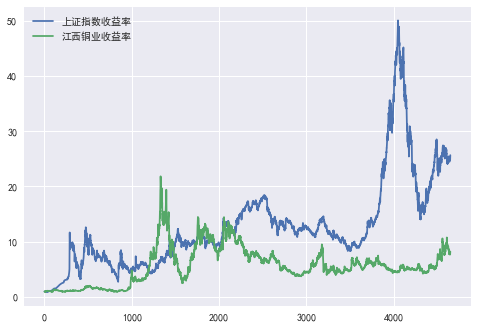

In [142]:
cmbdata.plot(kind='line')
plt.show()